In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation, Dropout,Flatten,Conv2D,MaxPool2D,Dense
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
#prepering the data
image_gen=ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
                             height_shift_range=0.1, rescale=1/255,
                            shear_range=0.2, zoom_range=0.2,
                            horizontal_flip=True, fill_mode='nearest')


In [3]:
###~~~building the model~~~###

model=Sequential()

#conv layer I
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(240,240,3),
                 activation='relu'))
#pooling layer I
model.add(MaxPool2D(pool_size=(2,2)))

#conv layer II
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(240,240,3),
                 activation='relu'))
#pooling layer II
model.add(MaxPool2D(pool_size=(2,2)))

#conv layer III
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(240,240,3),
                 activation='relu'))
#pooling layer III
model.add(MaxPool2D(pool_size=(2,2)))

#conv layer IV
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(240,240,3),
                 activation='relu'))
#pooling layer IV
model.add(MaxPool2D(pool_size=(2,2)))

#flatten
model.add(Flatten())

#Dense layer
model.add(Dense(128,activation='relu'))

#dropout layer
model.add(Dropout(0.5))

#output layer
model.add(Dense(5,activation='sigmoid'))

#compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [8]:
##~~reading the data ~~##

train_img=image_gen.flow_from_directory('FLOWERS\\train',
                                         target_size=(240,240), batch_size=16,
                                       class_mode='categorical')
                                     

test_img=image_gen.flow_from_directory('FLOWERS\\test',
                                       target_size=(240,240), batch_size=16, 
                                        class_mode='categorical')

train_img.class_indices

Found 3501 images belonging to 5 classes.
Found 848 images belonging to 5 classes.


{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [9]:
###~~~training the model~~~###

results=model.fit_generator(train_img,epochs=100, steps_per_epoch=75,
                            validation_data=test_img, validation_steps=12)

Epoch 1/100
75/75 [==============================] - 60s 801ms/step - loss: 1.4815 - acc: 0.3125 - val_loss: 1.2753 - val_acc: 0.3090
Epoch 2/100
75/75 [==============================] - 61s 814ms/step - loss: 1.3305 - acc: 0.4264 - val_loss: 1.2498 - val_acc: 0.3703
Epoch 3/100
75/75 [==============================] - 57s 765ms/step - loss: 1.2880 - acc: 0.4317 - val_loss: 1.3032 - val_acc: 0.3408
Epoch 4/100
75/75 [==============================] - 61s 809ms/step - loss: 1.2545 - acc: 0.4510 - val_loss: 1.1811 - val_acc: 0.4375
Epoch 5/100
75/75 [==============================] - 56s 751ms/step - loss: 1.2418 - acc: 0.4608 - val_loss: 1.1820 - val_acc: 0.3750
Epoch 6/100
75/75 [==============================] - 61s 810ms/step - loss: 1.1588 - acc: 0.4817 - val_loss: 1.2247 - val_acc: 0.2665
Epoch 7/100
75/75 [==============================] - 57s 755ms/step - loss: 1.1819 - acc: 0.5030 - val_loss: 1.1620 - val_acc: 0.5460
Epoch 8/100
75/75 [==============================] - 61s 815ms

In [10]:
model.save('five_flowers_model.h5')

In [19]:
def pred (p):
    if p==0:
        print("the model recognized it as a daisy")
    elif p==1:
         print("the model recognized it as a dandelion")
    elif p==2:
          print("the model recognized it as a rose")
    elif p==3:
          print("the model recognized it as a sunflower")       
    elif p==4:
          print("the model recognized it as a tulip")     
            

the model recognized it as a daisy


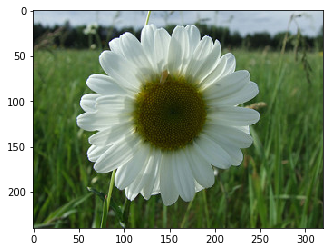

In [16]:
###~~~testing on the tests images~~~###

path='FLOWERS//test//daisy//534547364_3f6b7279d2_n.jpg'
flower=cv2.imread(path)
flower=cv2.cvtColor(flower,cv2.COLOR_BGR2RGB)
plt.imshow(flower)

flower_file=path
flower_img=image.load_img(flower_file, target_size=(240,240))
flower_img=image.img_to_array(flower_img)
flower_img=np.expand_dims(flower_img,axis=0)
flower_img=flower_img/255

p=model.predict_classes(flower_img)
pred(p)

the model recognized it as a dandelion


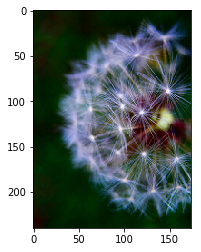

In [21]:
path='FLOWERS//test//dandelion/34583574661_8010a1fdf4_n.jpg'
flower=cv2.imread(path)
flower=cv2.cvtColor(flower,cv2.COLOR_BGR2RGB)
plt.imshow(flower)

flower_file=path
flower_img=image.load_img(flower_file, target_size=(240,240))
flower_img=image.img_to_array(flower_img)
flower_img=np.expand_dims(flower_img,axis=0)
flower_img=flower_img/255

p=model.predict_classes(flower_img)
pred(p)

the model recognized it as a rose


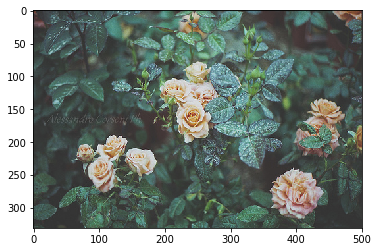

In [23]:
path='FLOWERS//test//rose//9458445402_79e4dfa89c.jpg'
flower=cv2.imread(path)
flower=cv2.cvtColor(flower,cv2.COLOR_BGR2RGB)
plt.imshow(flower)

flower_file=path
flower_img=image.load_img(flower_file, target_size=(240,240))
flower_img=image.img_to_array(flower_img)
flower_img=np.expand_dims(flower_img,axis=0)
flower_img=flower_img/255

p=model.predict_classes(flower_img)
pred(p)

the model recognized it as a sunflower


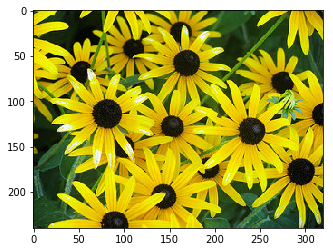

In [26]:
path='FLOWERS//test/sunflower//22429946721_e17a12cb39_n.jpg'
flower=cv2.imread(path)
flower=cv2.cvtColor(flower,cv2.COLOR_BGR2RGB)
plt.imshow(flower)

flower_file=path
flower_img=image.load_img(flower_file, target_size=(240,240))
flower_img=image.img_to_array(flower_img)
flower_img=np.expand_dims(flower_img,axis=0)
flower_img=flower_img/255

p=model.predict_classes(flower_img)
pred(p)

the model recognized it as a rose


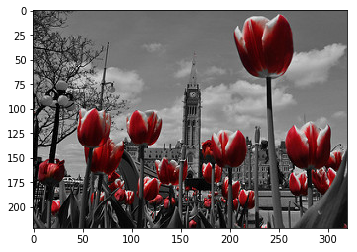

In [31]:
path='FLOWERS//test/tulip//4679869990_7c5f28f2fe_n.jpg'
flower=cv2.imread(path)
flower=cv2.cvtColor(flower,cv2.COLOR_BGR2RGB)
plt.imshow(flower)

flower_file=path
flower_img=image.load_img(flower_file, target_size=(240,240))
flower_img=image.img_to_array(flower_img)
flower_img=np.expand_dims(flower_img,axis=0)
flower_img=flower_img/255

p=model.predict_classes(flower_img)
pred(p)

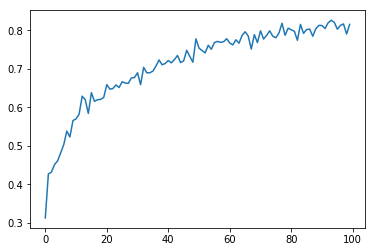

In [33]:
plt.plot(results.history['acc'])